### Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data

In [7]:
books_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Books.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
users_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Users.csv")
ratings_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ratings.csv")

In [10]:
books_data.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
##Lets see what these Different Url is doing

In [12]:
books_data['Image-URL-S'][0]    ###use given link to see image

'http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg'

In [13]:
books_data['Image-URL-M'][0]    ###use given link to see image

'http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg'

In [14]:
#images of different sizes may not have any relevence for model building or any other analysis maybe used in future for Building application purpose But for now It's of no use

In [15]:
users_data

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [16]:
ratings_data

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [17]:
# ISBN no. is useful for relating datasets of books and ratings but Url we are removing them for now

In [18]:
books_data = books_data[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher']]

In [19]:
##What we are going to do?
##1.find top books
##2.End Recommend 5 books to User relevent to its history 
# Note = Non rated book does not imply 0 rating

### Top Books

In [20]:
book_rating= ratings_data.groupby('ISBN')   ### rating groupby for each book

In [21]:
mean_rated_books = pd.DataFrame(book_rating['Book-Rating'].mean())    ### mean rating of each book

In [22]:
mean_rated_books.shape

(340556, 1)

In [23]:
rated_books = pd.concat([mean_rated_books,book_rating.size()],axis = 1)

In [24]:
rated_books['No. Of Ratings'] = rated_books[0]

In [25]:
rated_books = rated_books.drop(0,axis =1)

In [26]:
rated_books.sort_values('Book-Rating', ascending = False)

,Book-Rating,No. Of Ratings
ISBN,,
0874477050,10.0,1
561002010,10.0,1
0590939874,10.0,1
1570761914,10.0,1
56500624X,10.0,1
...,...,...
0866838937,0.0,1
0866839070,0.0,1
0866839100,0.0,1


In [27]:
rated_books.sort_values('No. Of Ratings', ascending = False)[100:120]

,Book-Rating,No. Of Ratings
ISBN,,
0684874350,4.115242,269
0671001795,3.464419,267
0805063897,4.142322,267
0553268880,2.260377,265
0380730138,2.245283,265
0316569321,3.396226,265
0679429220,3.159091,264
0440226104,2.794677,263
0446612545,3.098859,263


In [28]:
rated_books.describe()

,Book-Rating,No. Of Ratings
count,340556.000000,340556.000000
mean,2.943595,3.376185
std,3.345574,12.436252
min,0.000000,1.000000
25%,0.000000,1.000000
50%,1.800000,1.000000
75%,5.000000,2.000000
max,10.000000,2502.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


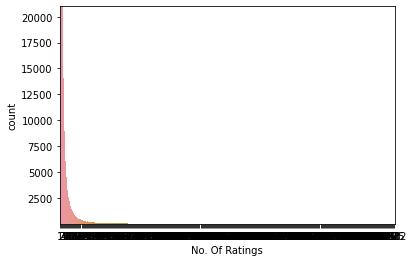

In [29]:
plt.xlim([1,3])
plt.ylim([1, 21000])

sns.countplot(rated_books['No. Of Ratings'])
plt.show()

In [30]:
rated_books[rated_books['No. Of Ratings']<5].shape[0]  ### more than half books rated by only one individual and around 90% books are rated by less than 5 individual
#we have to consider no. of rating also as parametere for considering top rated book as if one individual give full rating to abook cant considered as best book for all
#for that we will try to figure out how much minimum no. of rating we should conider

296791

In [31]:
### Most of the books are rated by very less peoples

In [32]:
r_data = rated_books[rated_books['No. Of Ratings']<10]

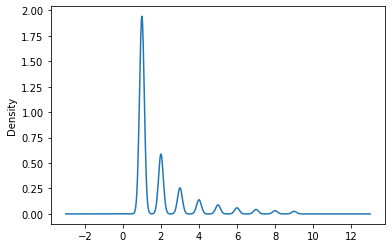

In [33]:
r_data['No. Of Ratings'].plot(kind='density')

In [34]:
## Books with less no. of ratings are comparably larger than smaller for initial values and become almost constant at smaller level at higher rating

In [35]:
##We try to generate a plot where on y axis we have No. of ratings and x axis have no. of books that have less no.of rating than that

In [36]:
table = np.arange(10,3000,10)
values = []
for i in table:
    values.append(rated_books[rated_books['No. Of Ratings']<i].shape[0] ) 

(10.0, 100.0)

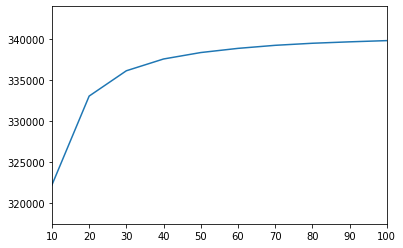

In [37]:
plt.plot(table, values) 
plt.ylim([317500,344000])
plt.xlim([10,100])

In [38]:
##after 40 the no. of ratings becoming constant i.e. 40 is our thershold means books after considerable for rating analysis as books have less fluctuation no. of rating after that 

In [39]:
top_books = rated_books[rated_books['No. Of Ratings']>40][rated_books['Book-Rating']>6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [40]:
top_books

,Book-Rating,No. Of Ratings
ISBN,,
0385199570,6.175439,57
0439064864,6.611765,170
0439136350,6.467005,197
0439139597,6.541237,194
0590353403,6.363095,168
0618002227,6.206349,63
0747546290,6.048780,41
0877017883,6.041667,72
1844262553,7.962963,54


In [41]:
# we can change above thershold of 40 and 6 to alter the no. of books its thumb rule but working fine here

In [42]:
list_top= []
for i in top_books.index:
    list_top.append(books_data[books_data["ISBN"]==i])

In [43]:
list_top

[            ISBN  ...        Publisher
 3357  0385199570  ...  Doubleday Books
 
 [1 rows x 5 columns],             ISBN  ...   Publisher
 5432  0439064864  ...  Scholastic
 
 [1 rows x 5 columns],             ISBN  ...   Publisher
 3839  0439136350  ...  Scholastic
 
 [1 rows x 5 columns],             ISBN  ...   Publisher
 5431  0439139597  ...  Scholastic
 
 [1 rows x 5 columns],             ISBN  ...   Publisher
 2809  0590353403  ...  Scholastic
 
 [1 rows x 5 columns],              ISBN  ...                 Publisher
 12763  0618002227  ...  Houghton Mifflin Company
 
 [1 rows x 5 columns], Empty DataFrame
 Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher]
 Index: [],              ISBN  ...        Publisher
 19640  0877017883  ...  Chronicle Books
 
 [1 rows x 5 columns],             ISBN Book-Title  ... Year-Of-Publication           Publisher
 3028  1844262553       Free  ...                2003  Upfront Publishing
 
 [1 rows x 5 columns]]

## Simmilar Users find 

In [44]:
users_data

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [45]:
users_data.Age.isna().sum()    

110762

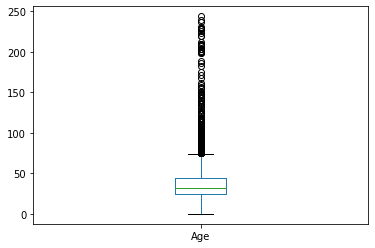

In [46]:
users_data.Age.plot(kind = 'box')

In [47]:
users_data[users_data['Age']>100]


# about 40% users age sis Unknown
# age is taking Unrealistic values like 250,120 
# age data is absurd can lead to exploitation of wrong information by model 

,User-ID,Location,Age
1288,1289,"san jose, california, usa",103.0
1322,1323,"milano, lombardia, italy",104.0
1578,1579,"akure, ondo/nigeria, nigeria",231.0
3084,3085,"zürich, switzerland, switzerland",104.0
3210,3211,"le mesnil saint denis, yvelines, france",119.0
...,...,...,...
276047,276048,"wien, wien, austria",127.0
276352,276353,"hillsdale, new york, usa",104.0
277107,277108,"quinto, ticino, switzerland",104.0
277503,277504,"san diego, california, usa",103.0


In [48]:
len(users_data.Location.unique())

57339

In [49]:
users_data.Location.isna().sum()

0

In [50]:
location_data = pd.DataFrame(users_data.Location.value_counts())

In [51]:
def draw_simmilar_location(number_of_user):
    simmilar_location_userl5 = location_data[location_data['Location']<number_of_user].sum()/278858*100
    simmilar_location_userg5 = location_data[location_data['Location']>=number_of_user].sum()/278858*100
    plt.bar(['simmilar_location_userl5', 'simmilar_location_userg5'], [float(simmilar_location_userl5), float(simmilar_location_userg5)])

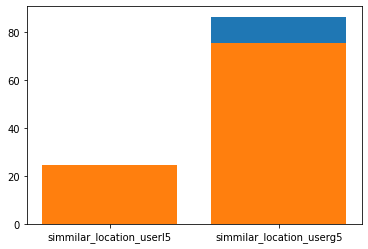

In [52]:
draw_simmilar_location(2)  # 80% have 1atleast 1 simmilar user
draw_simmilar_location(5) # almost 75% users have atleast 5 simmilar users


In [53]:
### Location can be an important factor for determining simmilarity among users but age is not ; now our task is to encode these location 

In [54]:
### 2 measures for simmilarity which we have are location and ratings data 

In [55]:
## same locations users are simmilar   ## may provide smaller no. of users
## same city users are simmilar         lets see how much they provide 
## same country uusers are simmilar     lets see how much they provide 
##for figuring these out we do some manipulation on data so lets copy users_data in new dataframe new

In [56]:
new = users_data.copy()

In [57]:
new['country'] = new['Location'].apply(lambda x : x.split(',')[-1])


In [58]:
users_in_countries = new['Location'].apply(lambda x : x.split(',')[-1]).value_counts()
(users_in_countries>100)

 usa                  True
 canada               True
 united kingdom       True
 germany              True
 spain                True
                     ...  
 prc                 False
 windham             False
 europa              False
 northern ireland    False
 canda               False
Name: Location, Length: 709, dtype: bool

In [59]:
new['country'].unique()

array([' usa', ' russia', ' portugal', ' united kingdom', ' canada',
       ' spain', ' australia', ' brazil', '', ' germany', ' mexico',
       ' china', ' italy', ' distrito federal', ' france', ' netherlands',
       ' iraq', ' finland', ' new zealand', ' india', ' ghana',
       ' switzerland', ' slovenia', ' iran', ' peru',
       ' bosnia and herzegovina', ' vietnam', ' sri lanka', ' pakistan',
       ' denmark', ' belgium', ' malaysia', ' u.a.e', ' turkey',
       ' philippines', ' greece', ' colombia', ' norway', ' kuwait',
       ' chile', ' quit', ' lj', ' taiwan', ' denmark"', ' españa',
       ' sweden', ' argentina', ' nigeria', ' london', ' bulgaria',
       ' austria', ' romania', ' singapore', ' albania', ' egypt',
       ' tunisia', ' uzbekistan', ' qatar', ' syria', ' saudi arabia',
       ' indonesia', ' sudan', ' somewherein space', ' poland',
       ' thailand', ' ireland', ' malaysia"', ' venezuela', ' paraguay',
       ' mozambique', ' morocco', ' afghanistan', '

In [60]:
###there are so many typos here for the countrys name

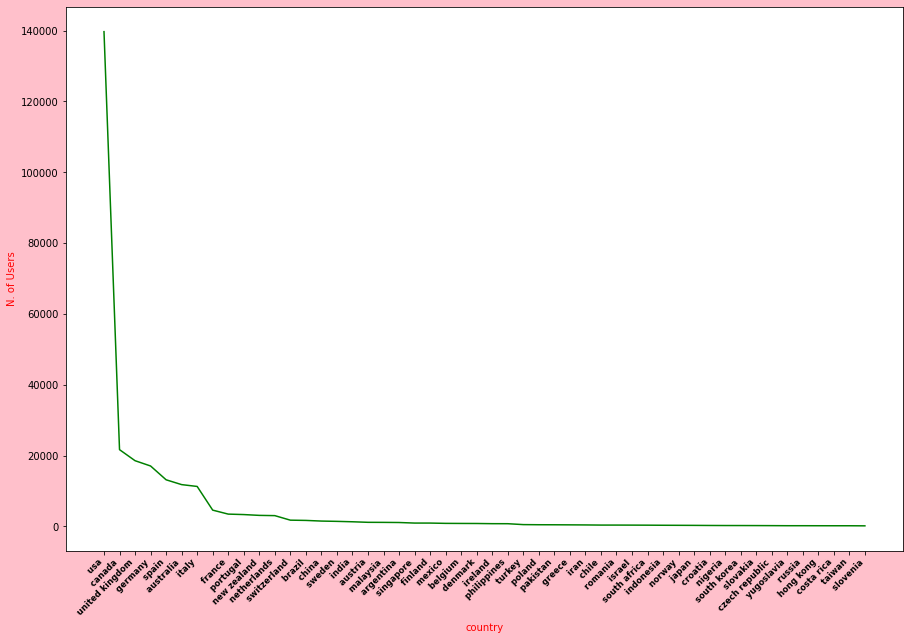

In [61]:
plt.figure(figsize=(15,10), facecolor = 'pink', edgecolor = 'blue')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='heavy',
    fontsize='small'  
)
plt.ylabel('N. of Users', color= 'red', )
plt.xlabel('country', color= 'red', )
plt.plot(users_in_countries.head(50).index, users_in_countries.head(50), color = 'green' )


In [62]:
users_in_countries.head(10).sum()

244505

In [63]:
276837/new.shape[0]    ### 87% people live in these top 10 countries

0.992752583752304

In [64]:
##

In [65]:
users_in_countries[50:71]

 peru                      140
 vietnam                   139
 egypt                     139
 venezuela                 139
 bulgaria                  133
 colombia                  132
 spain"                    111
 luxembourg                104
 hungary                    97
 thailand                   86
 ghana                      79
 saudi arabia               65
 portugal"                  65
 españa                     63
 united arab emirates       63
 bosnia and herzegovina     59
 sri lanka                  55
 denmark"                   52
 iceland                    52
 sweden"                    50
 paraguay                   46
Name: Location, dtype: int64

In [66]:
users_in_countries[70:100]

 paraguay               46
 guatemala              45
 bangladesh             44
 andorra                42
 ukraine                42
 lithuania              41
 latvia                 40
 bahamas                40
 bolivia                39
 jamaica                37
 panama                 37
 ecuador                37
 kuwait                 37
 cuba                   36
 lebanon                36
 morocco                34
 la france              34
 malta                  33
 trinidad and tobago    33
 france"                32
 scotland               31
 albania                31
 dominican republic     31
 afghanistan            31
 macedonia              31
 l`italia               30
 germany"               30
 england                30
 algeria                29
 urugua                 29
Name: Location, dtype: int64

In [67]:
## germany, france apperaing more than once
## top 100 coutries which have almost all users so neglecting rest as they have some ambiguity and noises
## fill their value of countries with 0 for telling model that countries have no sognificance their
## for case of larger user countries we can also conider cities as good parametre for defining sillilarity among users

In [68]:
new.replace({'germany"':'germany',
            'england':'united kingdom',
            "l`italia":'italy',
             'spain"':'spain',
             'portugal"':'portugal',
             'denmark"':'denmark',
             'sweden"':'sewden',
             'france"':'france'
             
            })

,User-ID,Location,Age,country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom
...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,usa
278854,278855,"tacoma, washington, united kingdom",50.0,united kingdom
278855,278856,"brampton, ontario, canada",NaN,canada
278856,278857,"knoxville, tennessee, usa",NaN,usa


In [69]:
top_100_countries = list(users_in_countries.head(100).index)

In [70]:
i=1
for country in top_100_countries:
    new['country'].replace(country, i, inplace = True)
    i = i+1

In [71]:
for j in range(new['country'].shape[0]):
    if type(new['country'][j]) != int:
        new['country'][j] = 0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
new['country'].unique()

array([1, 46, 10, 3, 2, 5, 6, 14, 8, 4, 23, 15, 7, 0, 9, 12, 22, 11, 17,
       61, 13, 50, 32, 51, 66, 52, 67, 30, 25, 24, 19, 28, 27, 31, 56, 38,
       83, 33, 49, 68, 64, 16, 20, 41, 55, 18, 34, 21, 92, 53, 62, 37, 29,
       60, 26, 54, 71, 86, 94, 57, 45, 43, 48, 40, 63, 35, 39, 69, 36, 84,
       47, 77, 97, 58, 76, 91, 99, 74, 81, 82, 93, 73, 65, 100, 96, 88,
       90, 72, 44, 42, 89, 87, 78, 79, 95, 98, 59, 75, 70, 80, 85],
      dtype=object)

In [73]:
new[new['country']==0]

,User-ID,Location,Age,country
42,43,"méxico, méxico city, distrito federal",NaN,0
93,94,"tehran, tehran, iraq",39.0,0
200,201,"sharjah, sharjah, u.a.e",NaN,0
256,257,"quit, quit, quit",NaN,0
257,258,"ljk, lkj, lj",NaN,0
...,...,...,...,...
278255,278256,"benghazi, n/a, libya",49.0,0
278498,278499,"brno, \n/a\"", czech republic""",NaN,0
278668,278669,"spring hill, fl, hernando",13.0,0
278781,278782,"larnaca, n/a, cyprus",NaN,0


In [74]:
new

,User-ID,Location,Age,country
0,1,"nyc, new york, usa",NaN,1
1,2,"stockton, california, usa",18.0,1
2,3,"moscow, yukon territory, russia",NaN,46
3,4,"porto, v.n.gaia, portugal",17.0,10
4,5,"farnborough, hants, united kingdom",NaN,3
...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,1
278854,278855,"tacoma, washington, united kingdom",50.0,3
278855,278856,"brampton, ontario, canada",NaN,2
278856,278857,"knoxville, tennessee, usa",NaN,1


In [75]:
##ratings and countries will be used to form vectors and country will given more weight while calculating distances and all books rating will have same weight
## data will shifted to another notebook after creation

### Create Sophasticated user data for model building

In [76]:
df = new[['User-ID','country']]

In [77]:
df.set_index('User-ID', inplace =True)

In [78]:
ratings_data

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [79]:
len(books_data['ISBN'].unique())    ## books in book_data

271360

In [80]:
len(set(ratings_data['ISBN'].unique()) - set(books_data['ISBN'].unique()))  ## book rated but not in books_data

70405